## Ejemplo completo

In [53]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


a = []
print("\n The Given Training Data Set \n")

with open('ws.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append (row)
print(a)      


 The Given Training Data Set 

[['sunny', 'hot', 'high', 'weak', 'no'], ['sunny', 'hot', 'high', 'strong', 'no'], ['overcast', 'hot', 'high', 'weak', 'yes'], ['rain', 'mild', 'high', 'weak', 'yes'], ['rain', 'cool', 'normal', 'weak', 'yes'], ['rain', 'cool', 'normal', 'strong', 'no'], ['overcast', 'cool', 'normal', 'strong', 'yes'], ['sunny', 'mild', 'high', 'weak', 'no'], ['sunny', 'cool', 'normal', 'weak', 'yes'], ['rain', 'mild', 'normal', 'weak', 'yes'], ['sunny', 'mild', 'normal', 'strong', 'yes'], ['overcast', 'mild', 'high', 'strong', 'yes'], ['overcast', 'hot', 'normal', 'weak', 'yes'], ['rain', 'mild', 'high', 'strong', 'no']]


In [54]:
attributes = [['sunny','rain','overcast'],
              ['cool','mild','hot'],
              ['normal','high'],
              ['strong','weak']]
print(len(a))
num_attributes = len(attributes)
print(num_attributes)

14
4


In [55]:
b=[]
y=[]
c=[]
for i in range(0,len(a)):
    b.append(a[i][0:num_attributes].copy())
    y.append(a[i][num_attributes])
    le = preprocessing.LabelEncoder()
    le.fit(a[i][0:num_attributes])
    c.append(le.transform(a[i][0:num_attributes]).copy())


In [56]:
df=pd.DataFrame(c)
print(df)
print(y)


    0  1  2  3
0   2  1  0  3
1   3  1  0  2
2   2  1  0  3
3   2  1  0  3
4   2  0  1  3
5   2  0  1  3
6   2  0  1  3
7   2  1  0  3
8   2  0  1  3
9   2  0  1  3
10  3  0  1  2
11  2  1  0  3
12  2  0  1  3
13  2  1  0  3
['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


In [57]:
train_X, test_X, train_y, test_y = train_test_split(c, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123)

In [96]:
dtree=DecisionTreeClassifier(max_leaf_nodes=3)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc=accuracy_score(train_y, predictions2)

ley = preprocessing.LabelEncoder()
ley.fit(y)
auc=roc_auc_score(ley.transform(test_y), ley.transform(predictions))

fpr, tpr, thresholds = roc_curve(ley.transform(test_y), ley.transform(predictions))
print(fpr)
print(tpr)
print(thresholds)


[0. 1. 1.]
[0.  0.5 1. ]
[2 1 0]


In [98]:
confusion_matrix(test_y, predictions)
confusion_matrix(train_y, predictions2)

array([[1, 1],
       [0, 7]], dtype=int64)

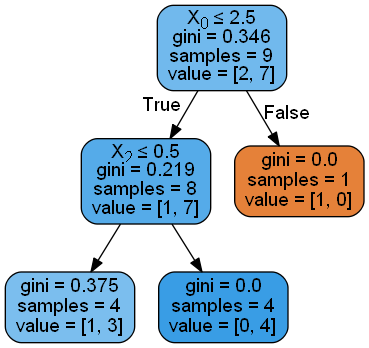

In [99]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[0. 1. 1.]
[0.  0.5 1. ]


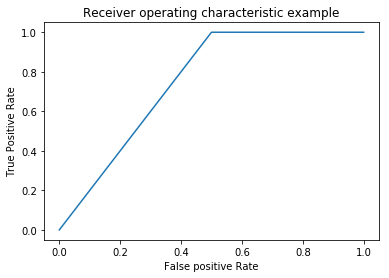

In [95]:
import matplotlib.pyplot as plt
print(fpr)
print(tpr)
plt.plot(tpr, fpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()